In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
df=fetch_olivetti_faces()
x=df.data
y=df.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


As we got small dataset and we need to ensure each class almost even split in both train and test data, in this case, we need perform Stratified Shuffle Split

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [ ]:
train_idx,test_idx=next(split.split(x,y))

In [ ]:
x_train=x[train_idx]
y_train=y[train_idx]
x_test=x[test_idx]
y_test=y[test_idx]

We can perform the PCA to speed up the k mean cluster

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)

x_pca_train=pca.fit_transform(x_train)
x_pca_test=pca.transform(x_test)

In [ ]:
pca.n_components_

111

The performance metric of K Mean Cluster is inertia

inertia is the mean squared distance between each instance and its closest centroid.

Score is the negative inertia as the rule of thrumb of score is 'great is better'

In [ ]:
from sklearn.cluster import KMeans
no_clusters=range(5,200,5)
inertia=[]
for i in no_clusters:
  model=KMeans(n_clusters=i).fit(x_pca_train)
  inertia.append(model.inertia_)

Text(0, 0.5, 'inertia')

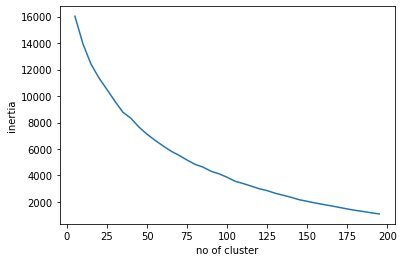

In [ ]:
plt.plot(no_clusters,inertia)
plt.xlabel('no of cluster')
plt.ylabel('inertia')

from the above diagram, we cannot find the elbow point, as we want to find  the elbow point of the inertia but we cannot find in that way

In [ ]:
# we can use the silhouette score instead
from sklearn.metrics import silhouette_score
sil_score=[]
for i in no_clusters:
  model=KMeans(n_clusters=i).fit(x_pca_train)
  sil_score.append(silhouette_score(x_pca_train,model.labels_))

Text(0, 0.5, 'silhouette_score')

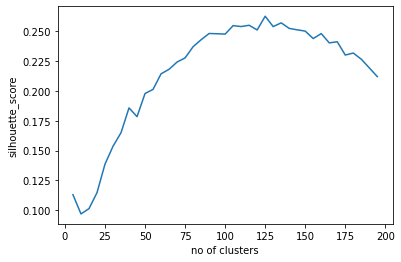

In [ ]:
plt.plot(no_clusters,sil_score)
plt.xlabel('no of clusters')
plt.ylabel('silhouette_score')

In [ ]:
# the best number of cluster is 120
no_clusters[np.argmax(sil_score)]

125

 The silhouette coefficient can vary between -1 and +1: a coefficient close to
+1 means that the instance is well inside its own cluster and far from other clusters,
while a coefficient close to 0 means that it is close to a cluster boundary, and finally a
coefficient close to -1 means that the instance may have been assigned to the wrong
cluster.

In [ ]:
# let see the silhouette score when no of cluster is 120
max(sil_score)

0.26266453

In [ ]:
final_model=KMeans(n_clusters=120)
final_model.fit(x_pca_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=120, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
x_train[final_model.labels_==3]

array([[0.46280992, 0.46280992, 0.4214876 , ..., 0.20247933, 0.1983471 ,
        0.2768595 ],
       [0.36363637, 0.33471075, 0.38016528, ..., 0.553719  , 0.18595041,
        0.20661157],
       [0.3966942 , 0.3677686 , 0.3429752 , ..., 0.37190083, 0.26859504,
        0.29752067],
       [0.44214877, 0.4214876 , 0.446281  , ..., 0.2892562 , 0.28099173,
        0.27272728],
       [0.17355372, 0.1322314 , 0.11157025, ..., 0.3264463 , 0.30165288,
        0.24380165]], dtype=float32)

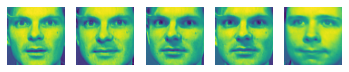

In [ ]:
# try on cluster 3
for i in range(len(x_train[final_model.labels_==3])):
  plt.subplot(1,len(x_train[final_model.labels_==3]),i+1)
  plt.imshow(x_train[final_model.labels_==3][i].reshape(64,64))
  plt.axis('off')

It seems cluster 3 got all the similar faces, lets try on visualize all the cluster along with the faces within cluster

In [ ]:
# we get the label along with image array
group={}
for i in np.unique(final_model.labels_):
  group[i]=x_train[final_model.labels_==i]

In [ ]:
def plot_face(label):
  face=group[label]
  col=5
  row=len(face)//col+1
  plt.figure(figsize=(col,row*1.1))
  for i in range(len(face)):
    plt.subplot(row,col,i+1)
    plt.imshow(face[i].reshape(64,64))
    plt.axis('off')
    plt.title(label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


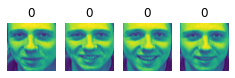

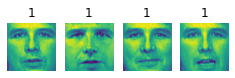

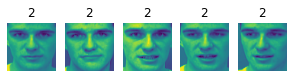

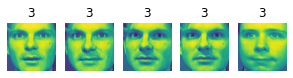

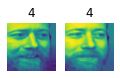

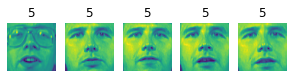

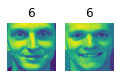

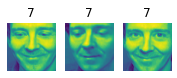

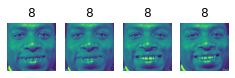

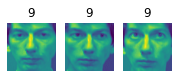

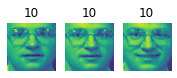

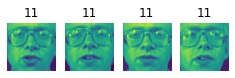

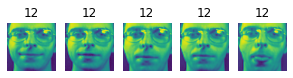

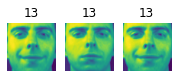

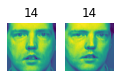

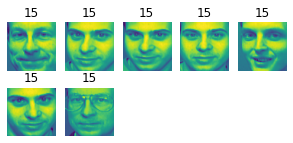

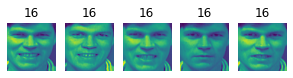

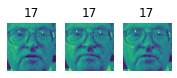

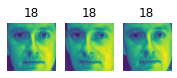

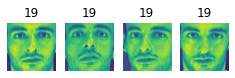

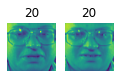

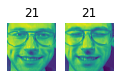

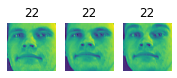

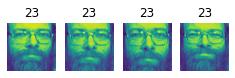

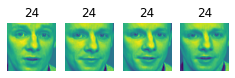

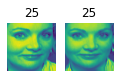

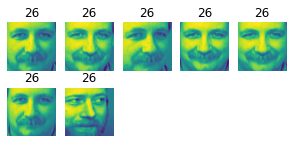

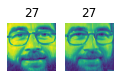

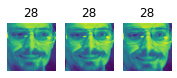

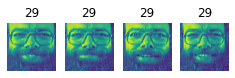

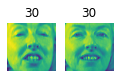

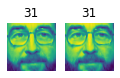

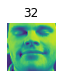

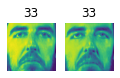

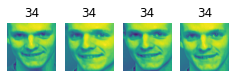

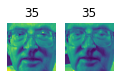

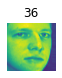

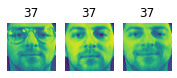

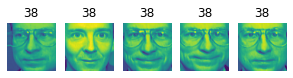

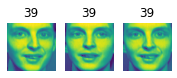

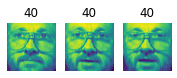

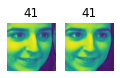

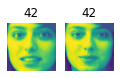

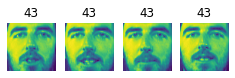

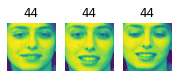

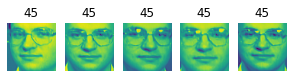

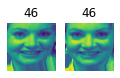

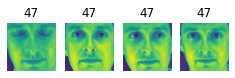

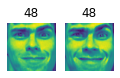

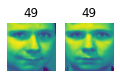

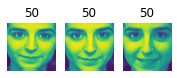

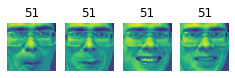

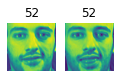

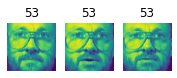

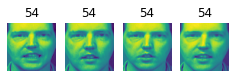

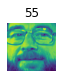

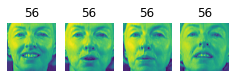

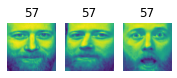

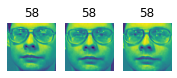

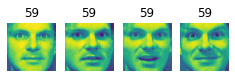

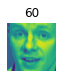

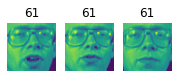

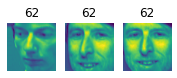

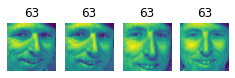

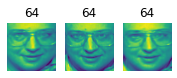

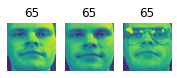

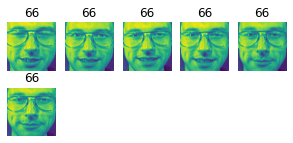

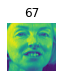

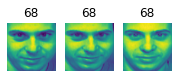

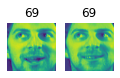

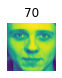

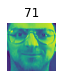

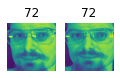

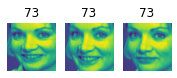

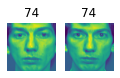

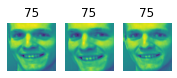

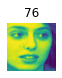

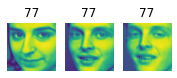

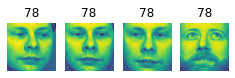

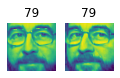

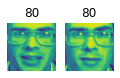

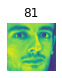

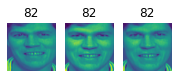

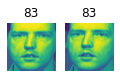

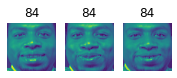

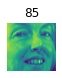

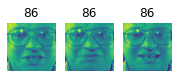

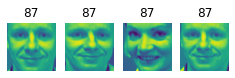

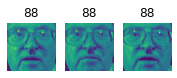

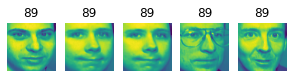

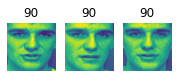

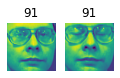

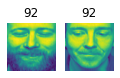

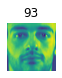

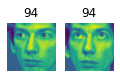

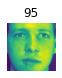

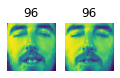

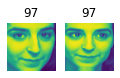

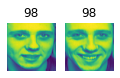

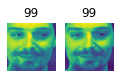

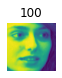

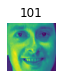

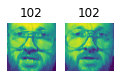

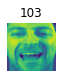

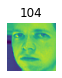

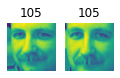

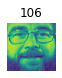

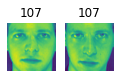

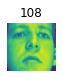

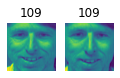

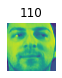

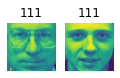

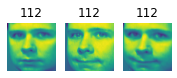

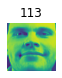

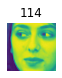

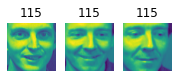

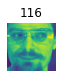

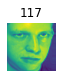

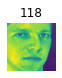

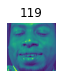

In [ ]:
for i in np.unique(final_model.labels_):
  plot_face(i)